In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/dataMinst/sign_mnist_train.csv',header=0)
test = pd.read_csv('/content/gdrive/MyDrive/dataMinst/sign_mnist_test.csv',header=0)

In [ ]:
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_data = np.array(train,dtype='float32')
test_data = np.array(test,dtype='float32')

In [ ]:
print('type of train_data is',train_data.dtype,
      'type of test_data is',test_data.dtype)

type of train_data is float32 type of test_data is float32


In [ ]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
               'O','P','Q','R','S','T','U','V','W','X','Y']

label for the image is:  S


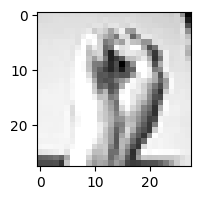

In [ ]:
i = random.randint(1,train.shape[0])
fig1, ax1 =plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)),cmap='gray')
print('label for the image is: ',class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'label')

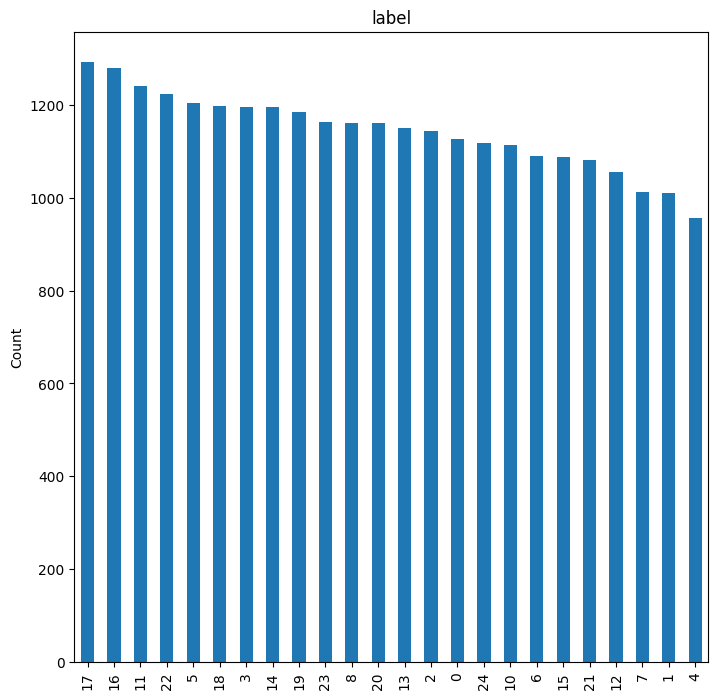

In [ ]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('label')

In [ ]:
train_data

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]], dtype=float32)

In [ ]:
x_train = train_data[:, 1:]/255.
x_test = test_data[:, 1:]/255.

In [ ]:
x_train

array([[0.41960785, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607844,
        0.7921569 ],
       [0.60784316, 0.6156863 , 0.6117647 , ..., 0.40392157, 0.5294118 ,
        0.58431375],
       [0.73333335, 0.7372549 , 0.7372549 , ..., 0.7647059 , 0.7607843 ,
        0.7647059 ],
       ...,
       [0.68235296, 0.68235296, 0.68235296, ..., 0.7921569 , 0.78431374,
        0.78431374],
       [0.69411767, 0.70980394, 0.72156864, ..., 0.2509804 , 0.34117648,
        0.3647059 ],
       [0.7019608 , 0.7058824 , 0.7058824 , ..., 0.8039216 , 0.81960785,
        0.84313726]], dtype=float32)

In [ ]:
y_train = train_data[:, 0]
y_train_cat= to_categorical(y_train, num_classes=25)

In [ ]:
y_test = test_data[:, 0]
y_test_cat = to_categorical(y_test,num_classes=25)

In [ ]:
print(x_train.shape,x_test.shape)

(27455, 784) (7172, 784)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],*(28,28,1))
x_test = x_test.reshape(x_test.shape[0],*(28,28,1))

In [ ]:
print('x_train.shape is',x_train.shape,'x_test.shape is',x_test.shape)

x_train.shape is (27455, 28, 28, 1) x_test.shape is (7172, 28, 28, 1)


#Model

In [ ]:
model =Sequential()

model.add(Conv2D(32, (3,3), input_shape= (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(25,activation='softmax'))

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
history = model.fit(x_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 13s 9ms/step - loss: 2.5145 - acc: 0.2309 - val_loss: 1.4976 - val_acc: 0.4886
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 1.0799 - acc: 0.6360 - val_loss: 0.7374 - val_acc: 0.7469
Epoch 3/10
215/215 [==============================] - 1s 6ms/step - loss: 0.6131 - acc: 0.7908 - val_loss: 0.5077 - val_acc: 0.8328
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.3977 - acc: 0.8647 - val_loss: 0.3832 - val_acc: 0.8735
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2662 - acc: 0.9109 - val_loss: 0.2886 - val_acc: 0.9044
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2010 - acc: 0.9336 - val_loss: 0.2608 - val_acc: 0.9169
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1477 - acc: 0.9515 - val_loss: 0.2184 - val_acc: 0.9347
Epoch 8/10
215/215 [==============================] - 2s 7ms/step - loss: 0

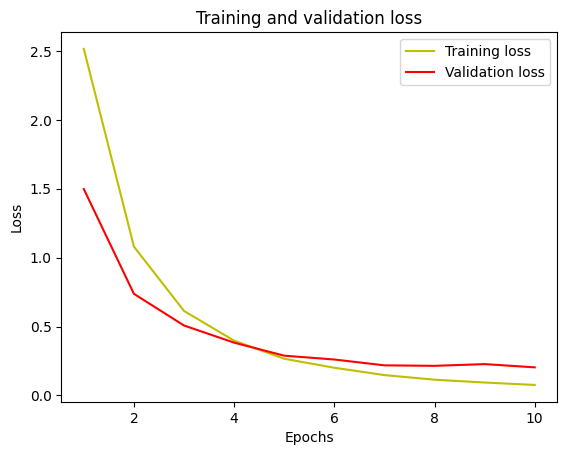

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

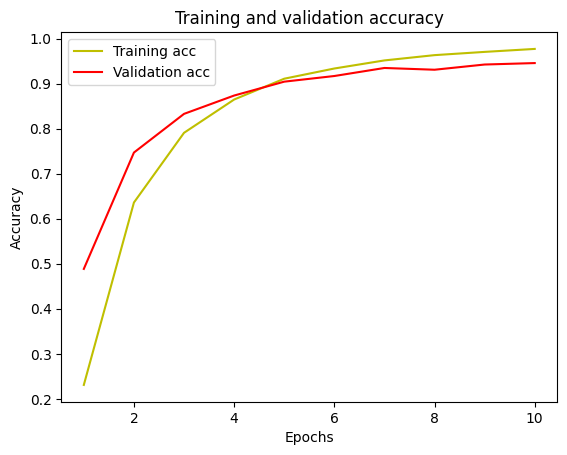

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = np.argmax(model.predict(x_test),axis=-1)

225/225 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9456218627997769


Predicted Label:  V
True Label:  V


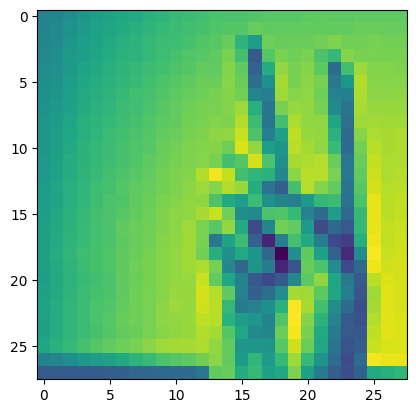

In [ ]:
i = random.randint(1,len(prediction))
plt.imshow(x_test[i,:,:,0])
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

<Axes: >

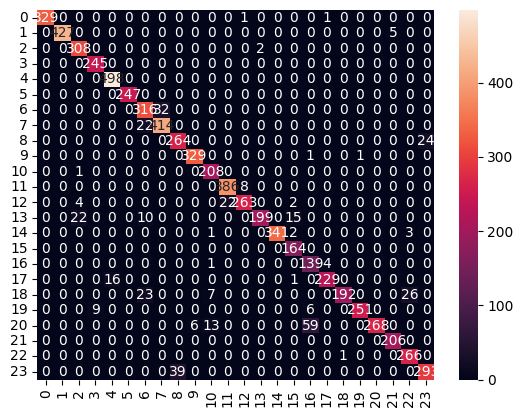

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

<Axes: >

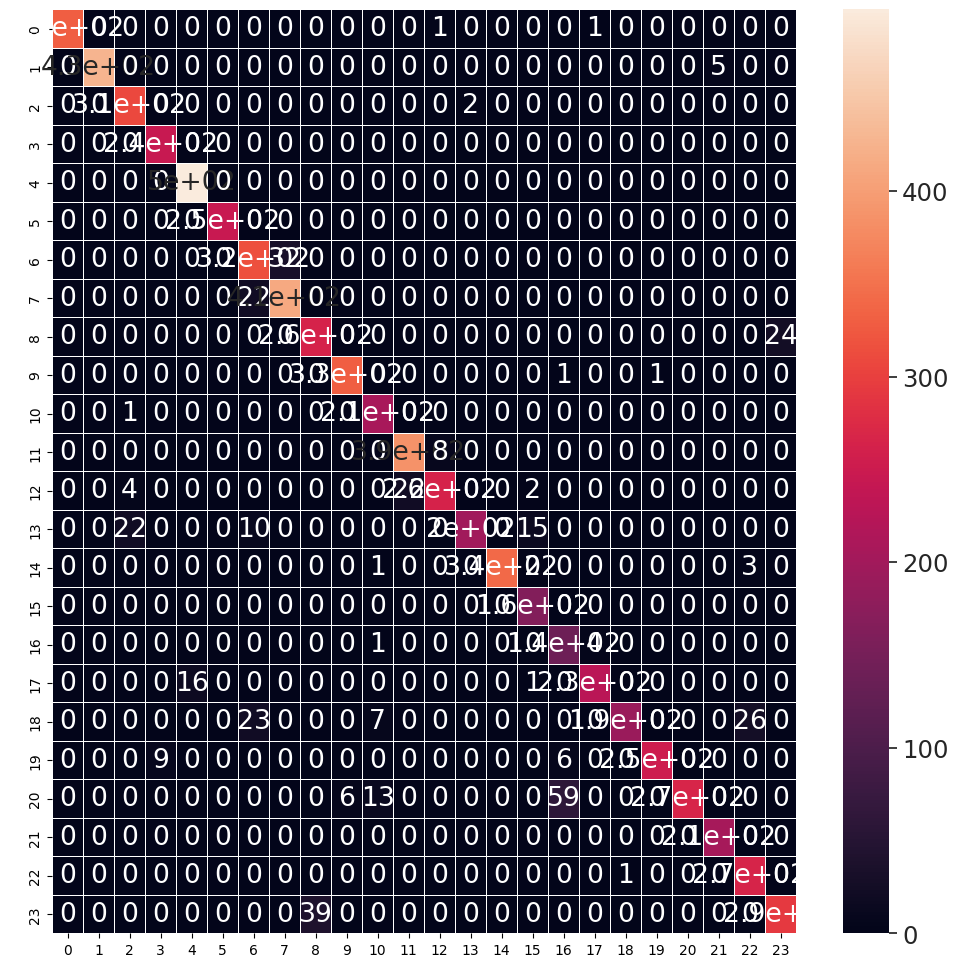

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x7fe0fc28bfa0>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L'),
  Text(12, 0, 'M'),
  Text(13, 0, 'N'),
  Text(14, 0, 'O'),
  Text(15, 0, 'P'),
  Text(16, 0, 'Q'),
  Text(17, 0, 'R'),
  Text(18, 0, 'S'),
  Text(19, 0, 'T'),
  Text(20, 0, 'U'),
  Text(21, 0, 'V'),
  Text(22, 0, 'W'),
  Text(23, 0, 'X'),
  Text(24, 0, 'Y')])

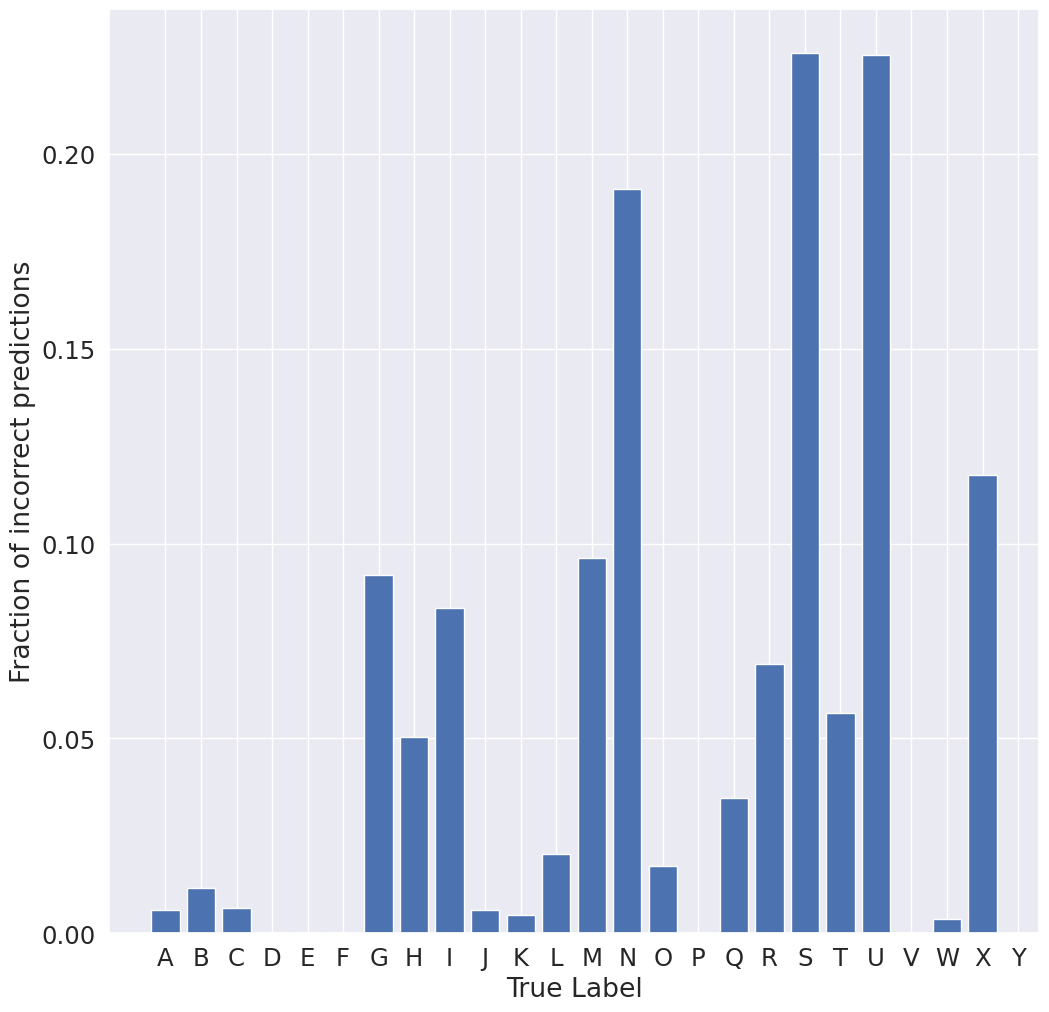

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=-1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names)

Text(0, 0.5, 'Fraction of incorrect predictions')

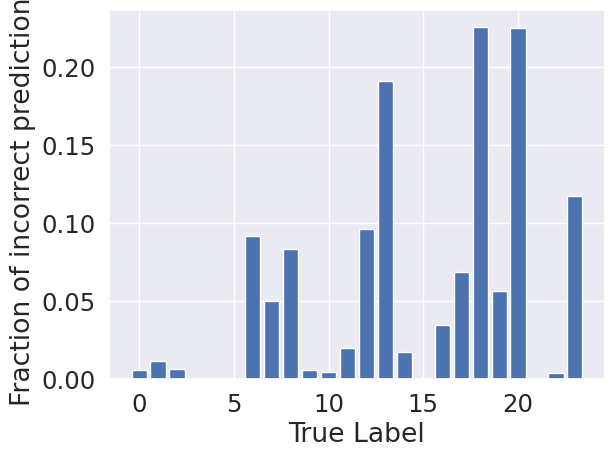

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')